In [1]:
from skimage.transform import resize
from skimage.color import rgb2gray
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt

FILE_PATH = './raw/jpg/Kolo.jpg'

In [2]:
from skimage.transform import radon, iradon
def load_image(file_path, size=128):
    image = imread(file_path)
    if image.ndim == 3:  # Convert to grayscale if it's a color image
        image = rgb2gray(image)
    image = resize(image, (size, size), mode='reflect', anti_aliasing=True)
    return image

C:\Users\maati\AppData\Local\Temp\ipykernel_7732\865503092.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(file_path)


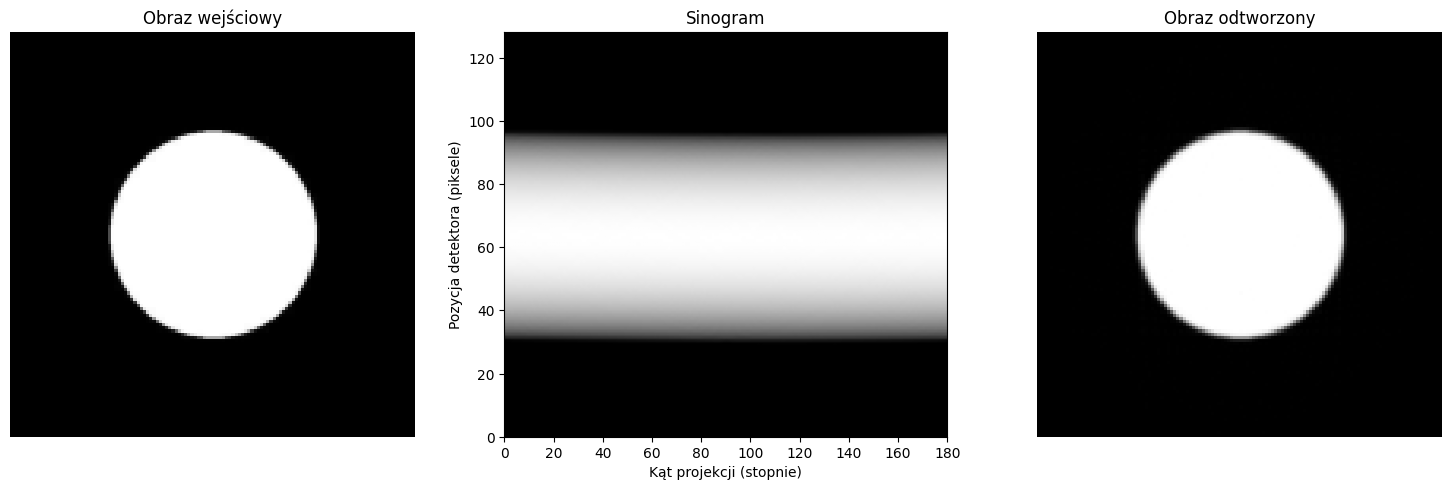

In [3]:
input_image = load_image(FILE_PATH)

theta = np.arange(180)
sinogram = radon(input_image, theta=theta)

reconstructed = iradon(sinogram, theta=theta, output_size=input_image.shape[0])

reconstructed = np.clip(reconstructed, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(input_image, cmap='gray', vmin=0, vmax=1)
axes[0].set_title('Obraz wejściowy')
axes[0].axis('off')

axes[1].imshow(sinogram, cmap='gray', aspect='auto', 
              extent=(0, 180, 0, sinogram.shape[0]))
axes[1].set_title('Sinogram')
axes[1].set_xlabel('Kąt projekcji (stopnie)')
axes[1].set_ylabel('Pozycja detektora (piksele)')

axes[2].imshow(reconstructed, cmap='gray', vmin=0, vmax=1)
axes[2].set_title('Obraz odtworzony')
axes[2].axis('off')

plt.tight_layout()
plt.show()